In [80]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from qiskit import *
import Mylist

%matplotlib nbagg


Familiarity with superposition and entanglement is a must when quantum programming. Not one quantum algorithm runs without the aid of these two processes. 

Let’s see a simple quantum program that utilizes both superposition and entanglement. I’ll use this program as a means to explain the introductory jargon I’ll be using throughout this essay. 

The set of instruction below are the commands used to execute the superposition and entanglement phases between qubits.
I'll describe in plain english what each set of instruction does.

From line 1 to line 2, we create two quantum registers and two classical registers respectively. We implement them both into the circuit in line 3, and then draw that very circuit in line 5, after dowloading the appropriate library (libraries used throughout this document are found above) . 

In [81]:
cr = ClassicalRegister(2) #line 1         
qr = QuantumRegister(2)   #line 2
circuit = QuantumCircuit(qr, cr) #line 3

%matplotlib inline 

circuit.draw() #5

q0_0: |0>
         
q0_1: |0>
         
 c0_0: 0 
         
 c0_1: 0

From line 1 to line 2, we create two quantum registers and two classical registers respectively. We implement them both into the circuit in line 3, and then draw that very circuit on line 5. 

This is a good time to became familiar with quantum notation. 

q0_0 is qubit one and is at state  $|0>$, it is also recognized by the vector $\binom{1}{0}$(in 2 dimensions); and, to add on to that, state  $|1>$ takes the vector $\binom{0}{1}$.

The other qubit, q0_1, is at the exact same state as q0_0. In a perfect quantum system, whenever we run this rather dull circuit, these bits will maintain the 0 state (you can think of it as a classical 0 state) the entire time. 

Both classical bits, c0_0 and c0_1, are set to state 0. 

Lets continue to flesh out this code.

In [4]:
circuit.h(qr[0]) # 6
circuit.draw() # 7

┌───┐
q0_0: |0>┤ H ├
         └───┘
q0_1: |0>─────
              
 c0_0: 0 ═════
              
 c0_1: 0 ═════

In line 6 we apply the quantum Hadamard gate, denoted in the circuit graph by H, to q0_0.  All quantum gates are reversible, more on this later. For now lets just focus on what the Hadamard gate does to q0_0. 
This means more notation coming our way.

The Hadamard gate, when acting on only one qubit, can be viewed as the matrix.

<h3><center>$H\Leftrightarrow$ $\begin{bmatrix} 1&1\\1&-1\\\end{bmatrix}$</center></h3>

The target qbit changes its state by performing a matrix multiplication in this way.

So, the line in the cicuit graph showing q0_0: $|0> H$ 

is the same as

<h3><center>$H|0>$ represents $\frac{1}{\sqrt{2}}\begin{bmatrix} 1&1\\1&-1\\\end{bmatrix}\begin{bmatrix} 1\\0\\\end{bmatrix}=\frac{1}{\sqrt{2}}\begin{bmatrix} 1\\1\\\end{bmatrix}$</center></h3>

The H gate is the gate that places the qbit in the superposition state. The vector resulting from the product is called a state vector of the qubit/qubits.

Think of |0> state as having a probability of 1 to collapse on classical bit 0, and probability 0 to collapse on classical bit 1.

What the hadamard gate does is that it sets a probabilistic value of 1/2 on both bits 0 and 1.

We’ve seen the H gate operating on qubit |0>. But not all qubits are always in the state 0. So, how does the H gate operate on a qubit that is superposition?
Here is how we would go about it.
Consider then, 

<h3><center>$H (\alpha |0> + \beta |1>)$</center></h3>

The $H$ gate is linear. This results in

<h3><center>$\alpha H |0> + \beta H|1> = \alpha (\frac{|0> + |1>}{\sqrt{2}}) + \beta (\frac{|0> - |1>}{\sqrt{2}}).$</center></h3>

<h3><center>$ = \frac{\alpha + \beta}{\sqrt{2}}|0> + \frac{\alpha - \beta}{\sqrt{2}}|1>.$</center></h3>

Now finding the probabilities of this one qubit lies solely on the coefficients of the states, due to the normalization state the state vectors are in,
know that 

<h3><center>($\frac{\alpha + \beta}{\sqrt{2}}$)$^2$ + ($\frac{\alpha - \beta}{\sqrt{2}}$)$^2 = 1.$</center></h3>

It suffices to say that,Landing on bit 0 has probability ($\frac{\alpha + \beta}{\sqrt{2}}$)$^2$ , and landing on bit 1 has probability ($\frac{\alpha - \beta}{\sqrt{2}}$)$^2$.

<br><br><br><br>

Exercise 1.1 
Think about it first. Try to get the correct answer in your first try. 

In [5]:
Q1 = Mylist.create_multipleChoice_widget('What is the probability of the qubit in the vector state transpose([1/5  2sqrt(6)/5]) to land on the classical state 1?',['.3','.04','.96'],'.96')

In [7]:
display(Q1)

Exercise 1.2 

Given the state of qubit i below. 

<h3><center>$\frac{1}{5}$|0> + $\frac{2\sqrt{6}}{5}$|1></center></h3>

After we apply Hadamard on qubit i, what will its new state be?

Hint: Try some matrix operations you know.
<br>Comment: Due to how my widget function is implemmented, I have to use row matrices. And for the sake of readability, we'll work with decimals.

In [2]:
Q2 = Mylist.create_multipleChoice_widget('pick one',['[.834  -.551]','[.334  .989]','[.845  .345]', ],'[.834  -.551]')

In [3]:
display(Q2)

So far, I’ve been talking about the behavior of only a single qubit.

In the code above, I created two qubits to use in this system. Applying the Hadamard gate on one qubit changed the qubit’s state from a deterministic one, since its state was |0> at all times, to a probabilistic one, .5 probability to land on bit 0 or 1 after measurement. 

At this point in the code, the second qubit, q0_1, is left alone on its |0> state. So the measurements of these two qubits would either be 00 or 10. 

As soon as we apply an H gate to the second qubit, then the expected outcomes would be 00, 01, 10, and 11-With each state having probability .25 of occurring, after measurement. 
So instead of having the superpositioned state, $\alpha |0> + \beta |1>$, representing a single qubit, we now need a more complex state to represent multiqubit states.

Multiplying the probabilities of the states of all qubits at hand seems to be enough to represent the state of the whole. Many sources introducing this multiqubit state, at this point, would call into attention the tensor product to perform the appropriate computations. But I won’t use this operator here, so just think of this multiqubit state as follows.

Take the qubit states for each qubit, like (for this example I’ll abstain from using greek characters)

Qubit 1 has state A|0> + B|1>.
<br>Qubit 2 has state C|0> + D|1>.
<br>Qubit 2 has state E|0> + F|1>.
<br>And so on…

Then multiply then to get their multiqubit state

(A|0> + B|1>)(C|0> + D|1>)(E|0> + F|1>)…
<br>( AC|00> +AD|01> + BC|10> + BD|11> ) (E|0> + F|1>)…

The vectorstate (vector is normalized) of qubits 1 and 2 is 

<b5><center>$[AC$ <t> $AD$ <t> $BC$ <t> $BD$ <t>   $]^t$</center></b5>

With probabilities $AC^2$  to collapse on |00>, $AD^2$  to collapse on |01>, $BC^2$  on |10>,and $BD^2$  on |11>.

Finding the states of 3 or more qubits follows the same scheme above, just continue to multiply until we run out of qubits.
<br><br><br>


This is a good time to sharpen our skills. But before getting into the next exercise, I would like to share with you an identity that will soon come in handy. 

# Identitiy 1:

Let $ a,b \in {0,1}$ such that a is not equal to b.

|a>|b> ... = |a b ...> 

There in no depth in this notation shortcut. You'll see. It just makes things easier to read.
<br><br><br>
Exercise 1.3:

During my time in quarantine, I booted up jupyter notebooks to, I don't know, play with some ramdom quantum gates. Of course, in the presence of quantum gates, there you will also find qubits, In this fictional experience, 4 of them to be precise. After applying these mysterious quantum gates, and I am not going to reveal their identities now, on my four qubits, I ended up with the multibit state

<h3><center>0|0000> + 0|0001> + $\frac{1}{5 \sqrt{2}}$|0010> + 0|0011> + 0|0100> $\frac{2 \sqrt{6}}{5 \sqrt{2}}$|0110> + 0|0111> + 0|1000> + 0|1001> + $\frac{1}{5 \sqrt{2}}$|1010> + 0|1011> + 0|1100> + 0|1101> + $\frac{2 \sqrt{6}}{5 \sqrt{2}}$|1110> + 0|1111> </center></h3>

What I need you to do is simple. The state we have above is the overall combined state of the qubit. I want to know, and so do you, the state of each individual quibit prior to the combined state.

Hint(scroll):
I used a hadamard gate on one of the qubit. I did not apply any gates on two of the qubits. 

Ans:
Prior to multiqubit state representation, qubit state were $\frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1>$,$\frac{1}{5}|0> + \frac{12 \sqrt{6}}{5}|1>$, $|1>$, and $|0>.$ 


In [102]:
def update_myW(hint, ans):

    if hint == hint :
        print('this is the hint')


widgets.Box(
    [
        widgets.Label(value='Pizza topping with a very long label:'),
        widgets.RadioButtons(
            options=[
                'hint',
                'ans',
                'anchovies',
                'and the long name that will fit fine and the long name that will fit fine and the long name that will fit fine '
            ],
            layout={'width': 'max-content'}
        )
    ]
)

widgets.interactive(update_myW,  hint = hint, ans=ans )

NameError: name 'hint' is not defined

In [ ]:
Back to the code, I am growing weary of the math by now.
Picking up from where we left off, takes us to line 8.

In [15]:
circuit.cx(qr[0], qr[1]) # 8
circuit.draw() # 9

┌───┐     
q0_0: |0>┤ H ├──■──
         └───┘┌─┴─┐
q0_1: |0>─────┤ X ├
              └───┘
 c0_0: 0 ══════════
                   
 c0_1: 0 ══════════

In [16]:
circuit.measure(qr, cr) # 10
circuit.draw() # 11

┌───┐     ┌─┐   
q0_0: |0>┤ H ├──■──┤M├───
         └───┘┌─┴─┐└╥┘┌─┐
q0_1: |0>─────┤ X ├─╫─┤M├
              └───┘ ║ └╥┘
 c0_0: 0 ═══════════╩══╬═
                       ║ 
 c0_1: 0 ══════════════╩═

In line 7 we apply a new quantum gate to the circuit, the cx quantum gate. This gate creates/simulates Entanglement. Here, we have q0_0 as a control qubit and q0_1 as a target cubit. 
In the perfect quantum environment, when entanglement occurs, qubits that are entangled, after measurement (measurements are performed in line 10), contain the same spin, that being, if q0_0 is measured to be in state |0>, then q0_1 will also be in state |0>; equivalently, if q0_0 is measured to be in state |1>, then q0_1 will be in state |1>.
<br> Note: think of spin as the state of the qubit. 
<br> Comment: This is the behavior Eistein though to be "freaky".(link) 

<br>
To the next line of our code.

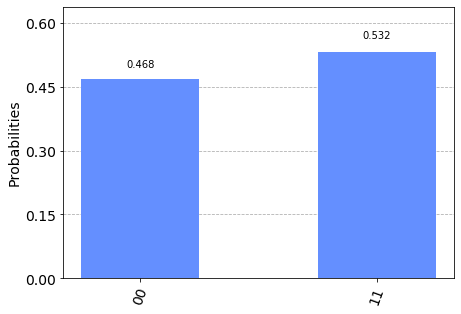

In [18]:
simulator = Aer.get_backend('qasm_simulator') # 12
result = execute(circuit, backend = simulator).result() # 13
from qiskit.tools.visualization import plot_histogram # 14
plot_histogram(result.get_counts(circuit)) # 15

The qasm_simulator call, set on line 12, acts as a perfect quantum computer simulator. In line 13, we run the circuit we’ve built through this simulator and acquire the results right away. We project the results onto a histogram. Probabilities will differ here. If we ran this circuit an infinite number of times, the probability for the qubit states to land on  00 and 11 states would both be .5. Since this is not an infinite run, we’ll get something close to that.
Also, the way you read the measurements is from the bottom to the top. In this case, it is hard to be confused about the results since we are simulating entanglement, with the cx gate, in a circuit containing only two qubits. But if you decide to continue with your quantum conputer studies using this same set up. knowing how to read your results is vital for your future success. 

<br><br>
You might be thinking right now "is this it?" in short. yes, kind of. What we established here is the simulation of superpositon and entaglement quantum processes. Now, I beg you to ponder a little longer on how simulations can differ from the real thing. Truth be told, IBM's quantum computer have a hard time producing the results we got above. 
<br> That is, IBM's quantum engineers are having a lot of trouble manipulating their qubit of choice to behave in the desired manner. So, whether they are using electrons, or atoms, or whatever else that can be used as a qubit. As of right now, they can't perfectly manipulate the qubit to fit a desired state. They're close. How close? we'll investigate that now.

Run the following code to see what its output is. What it does is that it will run the circuit we created in a real quantum computer. We access IBM's servers and we are allocated a spot (this means that there may be a waiting window) to run our circuit. 
For now, just run the code, and wait for the results. Compare the upcoming histogram with the histogram above, in this way, you will soon realize IBM's quantum computer shortcomings.


In [79]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(circuit, backend = qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()
job_monitor(job)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
plot_histogram(result.get_counts(circuit))

#introduction ends here
#to do still:
#hyperlink all sources of  my sources
#3rd exercise needs a different widget
#last programming exercise


AttributeError: module 'qiskit.circuit' has no attribute 'name'

Part II

What I wish to do for the rest of this paper is, to the best of my ability, demonstrate what the big deal about quantum computing is. 
Many quantum computing initiate guides either emphasizes on the code writing or on the math behind it. Sincerely, focusing on the code writing alone is so lame-It feels like you’re navigating a dark room with only the aid of a stranger’s hand to steer you to the right direction; whereas, if you look at the math only-The experience is equally as terrible. 

But I believe, I made a good filter here. At least good enough to the point where you can appreciate, in a more substantial way, the capacity of quantum algorithms, and the edge it has over its classical counterparts. 

I am going to start with one of the simple quantum algorithms. Unfortunately, simple here does not mean simple to grasp, but like, it is one of the simplest quantum algorithms. So, “simple” here does imply something-just not what you think it is.

I have decided to skip quantum teleportation , which is the transfer of quantum information to one qubit to another, and super dense coding  for now. They are used in many quantum algorithms, so there is no need to dedicate an entire section to them. 

With that said, Let’s continue our quantum journey.
<br><br><br>
Deutsch’s Algorithm 

<br>

What is the advantage this algorithm has over a classical one? 

You don’t need to answer this now. Let your goal be to answer this question after you’re done with this section. I’ll post the question again later. Then, try you’ll to answer it. It is a little difficult to see what the difference is.

<br><br>
Problem:

We start the problem with a function that maps the set {0,1}  to {0,1}. And we have a device, which we’ll call a blackbox, that computes the output for every given input of the function.  This first sounds weird, but it is something we do all the time. 
<br>
Think of the blackbox as a shortcut, a block of code, that has the same input-output behavior as the function.
<br><br>
For example, let $f: N^+ \longrightarrow$ {0,1}}, i.e, the function takes an even or an odd integer and maps them to a 0 or a 1.

This could end in,<br><br>
<h3><center>$f1(even)=1$ <t> and <t> $f(odd)= 0$ <br><br>or in <br><br>$f1(even)=1$ <t> and <t> $f(odd)= 1$  <br><br>or in <br><br> $f1(even)=0$ <t> and <t> $f(odd)= 0$ <br><br>or in <br><br>$f1(even)=0$ <t> and <t> $f(odd)= 1$</center></h3>
<br><br>
So the function could be a mod 2 function if you wanted to, or some other crazy thing we decided to do, and the blackbox would just be an if-else block in your code that has the same input-output correspondence as the function has.<br><br>
The things to note here is that we either get a balanced number of inputs (so function maps to 0 and 1) or a constant number of outputs (function only maps to 0 or it only maps to 1).<br><br>
Now, if I gave you some ramdom $f$ function that has a behavior that is equal to either one of the four functions above, how would you determine the behavior of this mystery function? <br>
You could guess, right? There is a good shot you might get it right. Or, you could plug-in. C’mon, there is only 2 inputs and outputs to check here. There is no room to be lazy.<br>
Classically then, this problem is pretty fast to solve, even if the function is overwhelmingly complex. Your blackbox would drastically lower the computing power, so it wouldn’t take long to determine which function mystery $f$ is similar to. <br><br>
Lets move on to a bigger challenge then. How would you determine the behavior $f$ exhibits if you only had one shot to get it right? That is, you can only test one input.
If determining what $f$ is, is a life or death situation, would you be comfortable solving this problem classically? Or, would you try to find other means to attain an answer?<br><br>
    
This, one shot to determine the answer problem, is the problem Deutsch’s Algorithm solves. <br><br>

One idea out of the door is that our blackbox cannot be a one qubit gate. Because, if our mystery function is equivalent to $f3$ (the third function, from the top, above), the matrix representation would be

<h3><center> $\begin{bmatrix} 1&1\\0&0\\\end{bmatrix}$</center></h3>
<br><br>
This matrix is not unitary, so it can’t be part of a quantum circuit.<br>
As a result, we need to define a two qubit quantum gate that simulates the behavior of the mystery function. Name it $B_f$, and let it follow the following procedure.








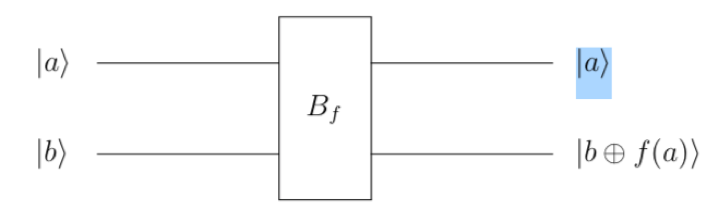
<b1><left> figure 1</left></b1>


where, $\oplus$ is the XOR classical gate.<br><br> 

You may comment, “in the classical case we needed two inputs to determine the mystery function, and it appears that we need to do the same here.”
This is not the case. We need two starting qubits at states |0> or |1>. So you can have a set up where a = 0 and b = 0, or a = 1 and b =1, or a = 0 and b=1, or a = 1 and b = 0. It doesn’t matter. We just need two qubits that are not in superposition. This is not the same as two inputs.<br><br>
With that said, the matrix representation of qubits is forced to be one of the following due to the modification we’ll make on $B_f$, for it needs to be unitary.

<h3><center>$if$ ab = 00 then ( 1 0 0 0 )$^t$ <br><br>$if$ ab = 00 then ( 0 1 0 0 )$^t$<br><br>$if$ ab = 00 then ( 0 0 1 0 )$^t$<br><br>$if$ ab = 00 then ( 0 0 0 1 )$^t$</center></h3>
<br><br><br>
Say, if we wanted our mystery function to be balanced such that $f(0)$= 1 and $f(1)$ = 0, what is the matrix representation of $B_f?$<br><br>

<h3><center> $\begin{bmatrix} 0&1&0&0\\1&0&0&0\\0&0&1&0\\0&0&0&1\\\end{bmatrix}$</center></h3>
<br><br>
If we let a = 0 and b = 0 (from above), then <br><br>
<h3><center>$B_f*($ 1 0 0 0 $)^t$ = $($ 0 1 0 0 $)^t$.</h3></center>
<br><br>
That is, the right side of this equality is equivalent to $|a>$ = $|1>$ and $|b \oplus f(a)> =|0>$,the circuits identity. 
<br><br><br>
Exercise:<br><br>
Using figure 1 still. Lets manipulate it, so that on the right side of the above circuit (figure 1) we get $|a \oplus f(b)>$ instead of |a>, and |b> instead of $|b \oplus f(a)>$.<br>
Also, set a = 0 and b = 1. Let the mystery function resemble the function from the previous problem, that being, a balanced one, where f(1)=0 and f(0)=1. What is the resulting matrix representation of $B_f$?<br><br>

Note: The matrix of the blackbox is determined by knowing the states of the first two qubits coming in, and which function (out of the four) the mystery function mostly resembles. 

1st problem answer is the identity matrix.

<br>
One more exercise to get you to the zone. It is not much different from the one above. This time though, let's use the skeleton figure 1 provides, forget about the 1st problem's constraints. You'll have to find $b_f$ again, no change in that. Now, set a = 1 and b = 0. And, let f(1)=0 and f(0)=0, a constan 0. So, for the second time I ask, what is $b_f$?

ans: Matrix: row1: 0001, row2: 0100, row3: 0010, row4: 1000.

<br><br>





if you Keep playing with this exercise, eventually, you'll arrive at the identity.<br><br><br>

# Identity 2: <br><br>

<h3><center>$B_f |a>|b>$ =$|a>|b \oplus f(a)>$.</h3></center><br><br><br>

Which is the identity devised on figure 1. <br>
You’ll soon see how this identity is going to be used.

Now, we are ready to dig at the heart of Dr. Deutsch’s algorithm. 
Let start this, by setting a = 0, and b = 1.
The circuit of the algorithm looks as follows. We’ll look at it segment by segment. 





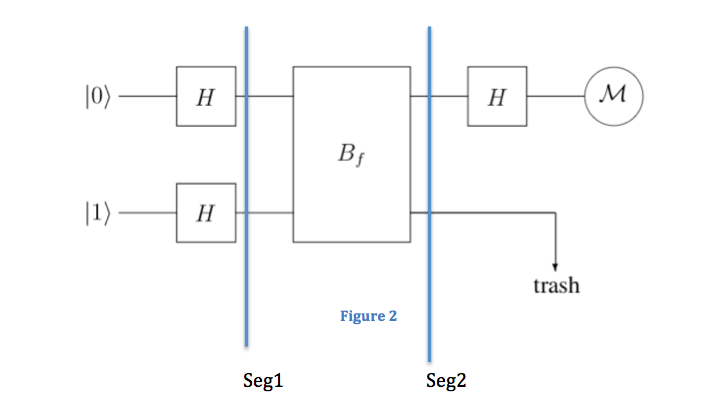

At the Seg1 point, our qubits are in superposition. Their state is remember is at <br><br><br>
<h3><center>$(\frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1>)  (\frac{1}{\sqrt{2}} |0> - \frac{1}{\sqrt{2}}|1>)$.</h3></center><br><br><br>

Expand it.<br><br><br>
<h3><center>$\frac{1}{2}|0>( |0> + |1>)  + \frac{1}{2}|0>( |0> + |1>)$.</h3></center><br><br><br>

On to Seg2, of which uses the blackbox, whatever the setup that may be at. Remember from the exercise, the blackbox changes depending on the initial qubit states we use at the start of the circuit, and it also depends on the behavior of the function. But thanks to our identity, we can continue on and mathematically graph our circuit.<br><br>
Applying $B_f$ now, and using our identity, we get.<br><br><br>

<h3><center>$B_f \frac{1}{2}|0>( |0> + |1>)  + B_f \frac{1}{2}|0>( |0> + |1>)$ <t><t>  (1)</h3></center><br><br>

<h3><center>$ \iff \frac{1}{2}|0>( |0 \oplus f(0)> + |1 \oplus f(0)>)  +  \frac{1}{2}|1>( |0 \oplus f(0) > - |1 \oplus f(0)>)$ <t> (2) </h3></center><br><br>

<h3><center>$\iff \frac{1}{2}(-1)^{f(0)}|0>( |0> - |1> )  + \frac{1}{2}(-1)^{f(1)}|0>( |0> - |1>)$ <t> (3)</h3></center><br><br><br>

About the modification made in (3), all I can give you is, if you stare at it long enough, you’ll develop the following identity.

# identity 3
<br>
For a = 1 or a= 0, 
<br><br><br>
<h3><center>$| 0 \oplus a > - |1 \oplus a> = (-1)^{a}(|0> - |1>). $ <t> </h3></center><br><br><br>
Just plug in the two possible values that a can take. You'll soon be conviced about the identity's validity, and line (3) will no longer look complicated. <br><br>
Continuing on <br><br>
simplifying the expression even more yields,

<br><br><br>
<h3><center>$[\frac{1}{\sqrt{2}}(-1)^{f(0)}|0> + \frac{1}{\sqrt{2}}(-1)^{f(1)}|1> ][\frac{1}{\sqrt{2}}|0> - \frac{1}{\sqrt{2}}|1>]$ (4)</h3></center><br><br><br> 
Don't be confused by the brackets please. I just used them in place of parenthesis.<br><br>
This final state that we arrived at tells us somewhat important. The second qubit state, after the Hadamard gate was applied, remains unchanged. It is stil at $\frac{1}{\sqrt{2}}|0> - \frac{1}{\sqrt{2}}|1>$.<br>
But you might be inclined to think that this is a fluke. We got back the origianl qubit 1 state (after applying the Hadamard gate) by coincidence. To aquaint yourself with the equation above, go through it again, but instead of using starting qubits |0> and |1>, use the other 3 configurations, or less if you feel already convinced that the second qubit's state remains the same.<br><br><br>

Exercise 2.1 
Try to go through the formulas above with different starting qubits other than 01. <br>
I have delineated the steps of each case below.
<br><br>
Case 1: qubits at states |0> and |0>. 
still working in this exercise. 

In [78]:

%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn import datasets
digits = datasets.load_digits()
def browse_images(digits):
    n = len(digits.images)
    def view_image(i):
        plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Training: %s' % digits.target[i])
        plt.show()
    interact(view_image, i=(0,n-1))

browse_images(, )

SyntaxError: invalid syntax (<ipython-input-78-c9735f40dc7a>, line 14)

I hope we all agree that the second qubit's state remains unchanged by this point. That's great too, bacause There is more work to do here. We still can't answer whether the function is constant or balanced. <br>
Since, the second qubit does not offer much insight about the solution we are after, we discart it, and focus the rest of our attention to the what remains of formula (4).

<br><br><br>
<h3><center>$[\frac{1}{\sqrt{2}}(-1)^{f(0)}|0> + \frac{1}{\sqrt{2}}(-1)^{f(1)}|1>$ ]</h3></center><br><br><br> 
Which is equivalent to
<br><br>
<h3><center>$(-1)^{f(0)}(\frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}(-1)^{f(0) \oplus f(1)}|1>).$ </h3></center><br><br><br> 
The algorithm shows that we have yet to add the last gate to this qubit state. This gate happens to be the Hadamard gate, which leaves us with
<br><br><br>
<h3><center>$H((-1)^{f(0)}(\frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}(-1)^{f(0) \oplus f(1)}|1>)).$ </h3></center><br><br><br> 

<h3><center>$((-1)^{f(0)}H(\frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}(-1)^{f(0) \oplus f(1)}|1>)).$ </h3></center><br><br><br> 
As you know we can perform the following matrix multiplication to get the resulting state of 
<br><br><br>
<h3><center>$\frac{1}{\sqrt{2}}\begin{bmatrix} 1&1\\1&-1\\\end{bmatrix}$ $ \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}^{f(0) \oplus f(1)} \\\end{bmatrix}$ = $\begin{bmatrix} \frac{1}{2} + \frac{1}{2}(-1)^{f(0) \oplus f(1)} \\ \frac{1}{2} - \frac{1}{2}(-1)^{f(0) \oplus f(1)} \\\end{bmatrix}.$</h3></center>
<br><br><br>
It conveniently spits out the state |0> or |1>. How should these results be interpreted? <br>
The solution is staring right at our faces. <br>
Let's start with this. How else can we represent states |0> and |1>?<br> 
For a = 0 or a =1, I know this works.
<br><br><br> 
<h3><center>$H(\frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}(-1)^{a}|1>)).$ </h3></center><br><br><br> 
This entire thing can be simplified to $|a>$. <br>
Similarly, 
<br><br><br> 
<h3><center>$((-1)^{f(0)}H(\frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}(-1)^{f(0) \oplus f(1)}|1>)).$ </h3></center><br><br><br> 
Can be simplified to $f(0) \oplus f(1)$. The $(-1)^{f(0)}$ doesnt really change anything since -1 is the equivalent of 1 in mod 2. <br><br>
Does $f(0) \oplus f(1)$ look familiar to you at all? you're correct. It is the way we solve this problem classically. Through the use of a black box and our hadamard gate we achieve the same resolution the classical algorithm achieved, but it was all done in one shot.Thus, by using this circuit, when the undiscarded qubit is measured and its state happens to be |1>, we determine that $f$ is balanced, and when it happens to be at state|0>, $f$ is constant. <br><br>

You may be forming a track of arguments that may inhibit you from understanding what is at work here. You may be thinking on the lines of why we need this output that determines which type of function we are working with when we had determined the behavior of the blackbox from the start. That is, knowing the behavior the blackbox has automatically determined which type of function we are dealing with-Which is true-but then again, I appealed to the idea of how such a blackbox can be constructed, I did not say that we know what the blackbox is like prior to testing. 

The blackbox is designed in a way where it takes the entangled qubits that the user provides the circuit with and spits back a qubit state that determines the behavior of our mystery function. Now, how the blackbox inherited the input-output relationship from the mystery function is a process that is unknown by the user throughout the whole experiment. 


Exercise 2.3 
This exercise goes along with 2.2 
